<a href="https://colab.research.google.com/github/DinurakshanRavichandran/Visio-Glance/blob/XAI/cnn1_model(1)_with_LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model

model_path = '/content/drive/My Drive/cnn1_model_(1).h5'
try:
    model = load_model(model_path)
    print("Model loaded successfully from:", model_path)
except Exception as e:
    print("Error loading model:", e)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model loaded successfully from: /content/drive/My Drive/cnn1_model_(1).h5


In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,704,902 (6.50 MB)

 Trainable params: 1,702,916 (6.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 2 (12.00 B)

In [56]:
print(model.layers)
print(model.inputs)
print(model.outputs)

[<Conv2D name=conv2d, built=True>, <BatchNormalization name=batch_normalization, built=True>, <LeakyReLU name=leaky_re_lu, built=True>, <MaxPooling2D name=max_pooling2d, built=True>, <Dropout name=dropout, built=True>, <Conv2D name=conv2d_1, built=True>, <BatchNormalization name=batch_normalization_1, built=True>, <LeakyReLU name=leaky_re_lu_1, built=True>, <MaxPooling2D name=max_pooling2d_1, built=True>, <Dropout name=dropout_1, built=True>, <Conv2D name=conv2d_2, built=True>, <BatchNormalization name=batch_normalization_2, built=True>, <LeakyReLU name=leaky_re_lu_2, built=True>, <MaxPooling2D name=max_pooling2d_2, built=True>, <Dropout name=dropout_2, built=True>, <Conv2D name=conv2d_3, built=True>, <BatchNormalization name=batch_normalization_3, built=True>, <LeakyReLU name=leaky_re_lu_3, built=True>, <MaxPooling2D name=max_pooling2d_3, built=True>, <Dropout name=dropout_3, built=True>, <Conv2D name=conv2d_4, built=True>, <BatchNormalization name=batch_normalization_4, built=True>, 

In [57]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import os

# Class labels (Update this according to your dataset classes)
class_labels = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

def preprocess_image(image_path):
    """
    Preprocess an individual image for model prediction.
    """
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None

    # Resize the image to the model's input size
    image = cv2.resize(image, (224, 224))

    # Convert grayscale to RGB
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Normalize the image using the same preprocessing function
    image = tf.keras.applications.efficientnet.preprocess_input(image)

    # Expand dimensions to match model input shape (Batch size, Height, Width, Channels)
    image = np.expand_dims(image, axis=0)

    return image

def predict_image(model, image_path):
    """
    Predict the class of an individual image using the trained model.
    """
    image = preprocess_image(image_path)
    if image is None:
        return

    # Make prediction
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)

    print(f"Predicted Class: {class_labels[predicted_class]}")
    print(f"Confidence: {confidence:.4f}")

# Example Usage
model_path = '/content/drive/MyDrive/cnn1_model_(1).h5'  # Update this with your model path
model = load_model(model_path, compile=False)

# Test Image Path
test_image = '/content/drive/My Drive/Dinu/DME-30521-10.jpeg'  # Update with your image path
predict_image(model, test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Predicted Class: DME
Confidence: 0.9984


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

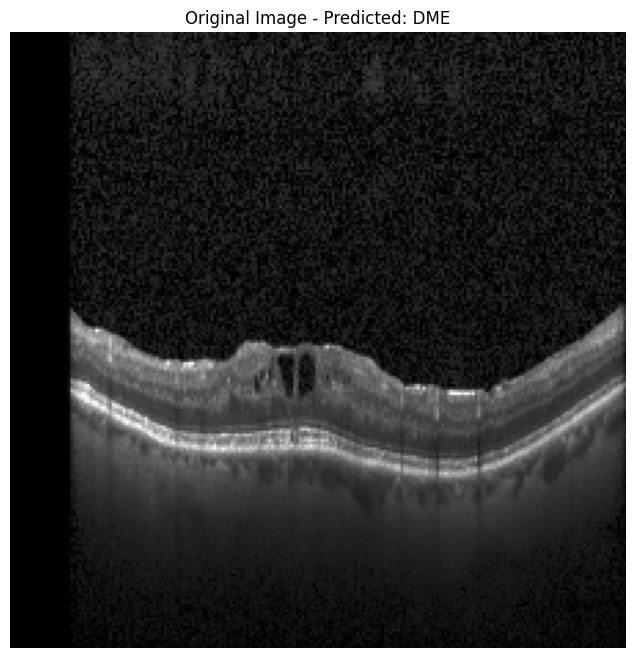

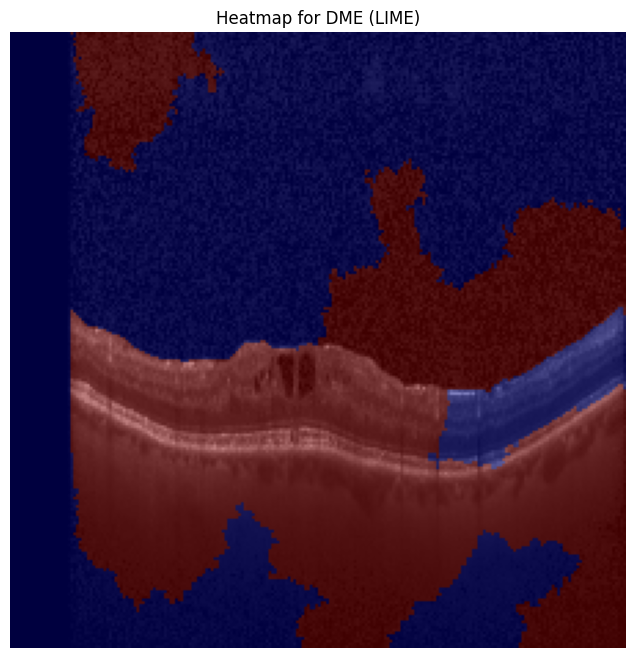

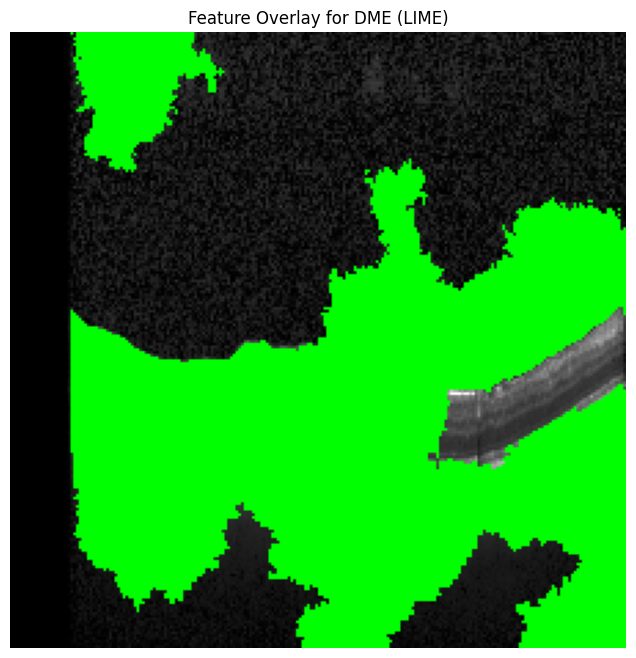

Predicted Class: DME - LIME applied correctly.


In [58]:
!pip install lime
import lime
from lime import lime_image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

def explain_prediction_with_lime(model, image_path, class_labels):

   # Explains the model's prediction using LIME and visualizes feature importance
   # using heatmaps and transparent overlays for better interpretability.


    # Load grayscale image and convert to RGB for visualization
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        print(f"Error: Unable to read image at {image_path}")
        return
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_GRAY2RGB)  # Convert grayscale to 3-channel RGB
    original_image_resized = cv2.resize(original_image_rgb, (224, 224))

    # Preprocess the image for the model
    processed_image = preprocess_image(image_path)[0]

    explainer = lime_image.LimeImageExplainer()

    # Function wrapper for LIME predictions
    def model_predict_wrapper(images):
        processed_images = np.array([tf.keras.applications.efficientnet.preprocess_input(img) for img in images])
        return model.predict(processed_images)

    # Get model prediction
    predictions = model.predict(np.expand_dims(processed_image, axis=0))
    predicted_class = np.argmax(predictions, axis=-1)[0]
    predicted_label = class_labels[predicted_class]

    # Generate LIME explanation for the predicted class
    explanation = explainer.explain_instance(
        processed_image,
        model_predict_wrapper,
        top_labels=1,
        hide_color=0,
        num_samples=1000,
    )

    # Display original image
    plt.figure(figsize=(8, 8))
    plt.imshow(original_image_resized, cmap="gray")  # Display as grayscale
    plt.title(f"Original Image - Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    # Get feature importance mask
    temp, mask = explanation.get_image_and_mask(
        predicted_class,
        positive_only=True,
        num_features=10,
        hide_rest=False,
    )

    # Heatmap Visualization
    plt.figure(figsize=(8, 8))
    plt.imshow(original_image_resized, cmap="gray")  # Display original grayscale image
    plt.imshow(mask, cmap='jet', alpha=0.5)  # Overlay heatmap
    plt.title(f"Heatmap for {predicted_label} (LIME)")
    plt.axis('off')
    plt.show()

    # **Alternative: Transparent Overlay (Blended Features)**
    blended = np.copy(original_image_resized)
    blended[mask == 1] = (0, 255, 0)  # Highlight important areas in green

    plt.figure(figsize=(8, 8))
    plt.imshow(blended)  # Show the blended image
    plt.title(f"Feature Overlay for {predicted_label} (LIME)")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {predicted_label} - LIME applied correctly.")

explain_prediction_with_lime(model, test_image, class_labels)

In [ ]:
import tensorflow as tf
import shap
import sys

print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("SHAP version:", shap.__version__)

# Check if running TensorFlow 2.x
print("Is TensorFlow 2.x:", tf.__version__.startswith("2"))

# Check if eager execution is enabled (should be True for TF 2.x)
print("Eager Execution Enabled:", tf.executing_eagerly())

# Check if SHAP can recognize TensorFlow backend
try:
    from tensorflow.keras import backend as K
    print("Keras Backend Learning Phase:", K.learning_phase)
except AttributeError:
    print("Keras Backend Learning Phase AttributeError (Expected in TF 2.6+)")


Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
TensorFlow version: 2.18.0
SHAP version: 0.46.0
Is TensorFlow 2.x: True
Eager Execution Enabled: True
Keras Backend Learning Phase AttributeError (Expected in TF 2.6+)


In [59]:
!pip install shap

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [00:48, 48.07s/it]               


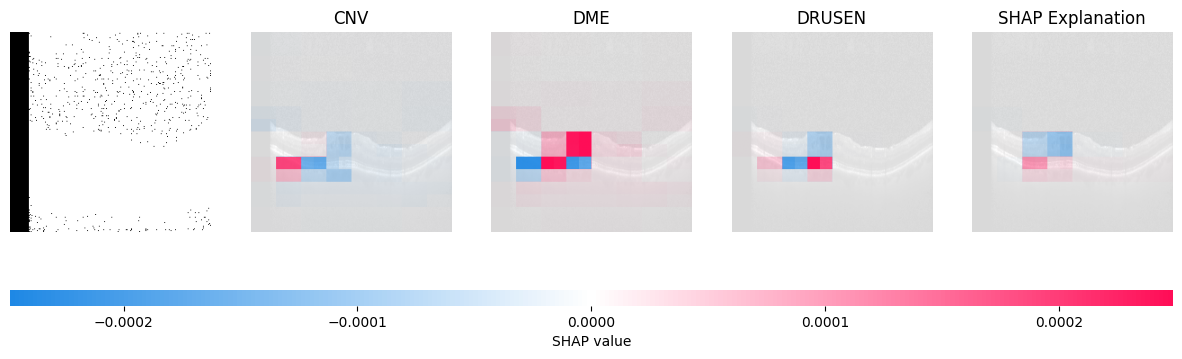

In [60]:
import shap
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model_path = '/content/drive/MyDrive/cnn1_model_(1).h5'
model = tf.keras.models.load_model(model_path, compile=False)

# Define the class labels corresponding to the model's output
class_labels = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

# Image preprocessing function to match the model's input format
def preprocess_image(image_path):
    # Read the image in grayscale mode
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None

    # Convert grayscale image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Resize image to 224x224 pixels (model input size)
    image = cv2.resize(image, (224, 224))

    # Apply the EfficientNet preprocessing (specific to the model)
    image = tf.keras.applications.efficientnet.preprocess_input(image)

    # Expand dimensions to match the model's input shape (batch size, height, width, channels)
    return np.expand_dims(image, axis=0).astype(np.float32)

# SHAP explanation function using KernelExplainer
def explain_with_kernel_shap(model, image_path, class_labels):
    # Preprocess the input image
    image = preprocess_image(image_path)
    if image is None:
        return

    # Create a background dataset
    background = np.random.rand(10, 224, 224, 3).astype(np.float32)

    # Initialize the SHAP image masker
    masker = shap.maskers.Image("inpaint_telea", background[0].shape)

    # Initialize SHAP explainer with the model and masker, providing the class labels
    explainer = shap.Explainer(model, masker, output_names=class_labels)

    # Compute SHAP values for the input image
    shap_values = explainer(image)

    # Select the SHAP values for the first (and only) sample in the batch
    shap_values = shap_values[0]

    # Visualize the SHAP explanation using the 'image' plot
    shap.plots.image(shap_values, pixel_values=image[0], show=False)
    plt.title("SHAP Explanation")
    plt.show()

# Path to the test image to be explained
test_image = '/content/drive/My Drive/Dinu/DME-30521-10.jpeg'

# Run the SHAP KernelExplainer with class labels for the given test image
explain_with_kernel_shap(model, test_image, class_labels)
